<a href="https://colab.research.google.com/github/Harika-Mullaguri/CUSTOM-GPT/blob/main/cv_preproceesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install opencv-python


In [2]:
import pandas as pd
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
uploaded = files.upload()

Saving download.jpeg to download.jpeg


In [4]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

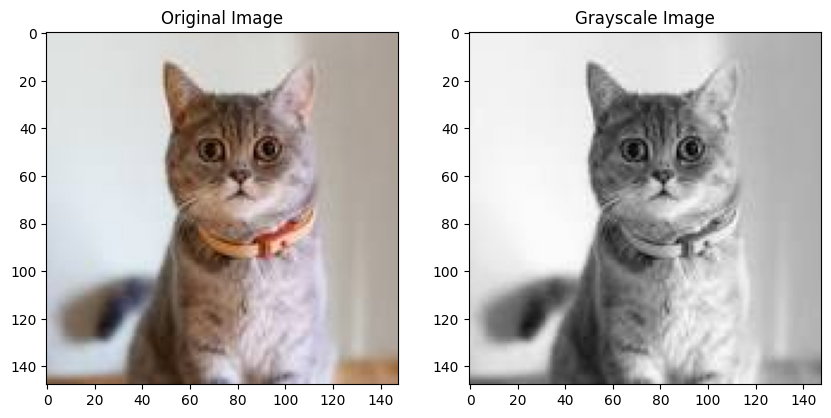

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale Image')
plt.show()

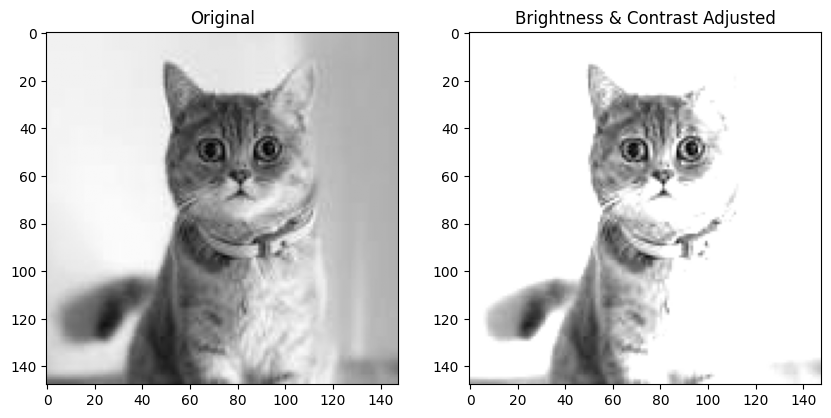

In [7]:
def adjust_brightness_contrast(img, alpha=1.5, beta=30):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

bright_img = adjust_brightness_contrast(gray)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(bright_img, cmap='gray'), plt.title('Brightness & Contrast Adjusted')
plt.show()

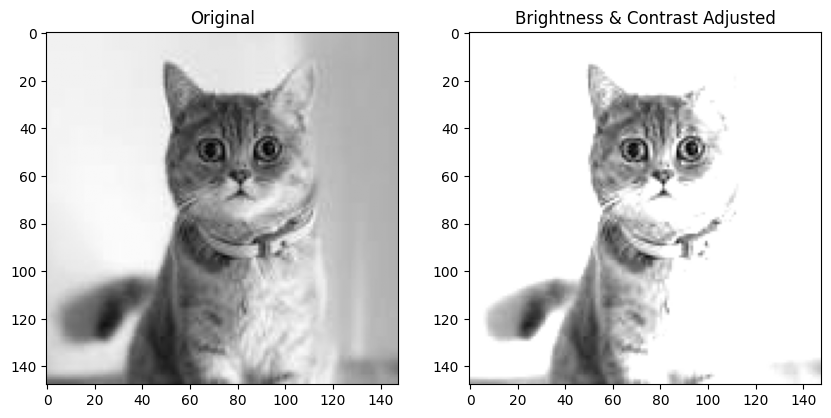

In [8]:
hist_eq = cv2.equalizeHist(gray)

def adjust_brightness_contrast(img, alpha=1.5, beta=30):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

bright_img = adjust_brightness_contrast(gray)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(bright_img, cmap='gray'), plt.title('Brightness & Contrast Adjusted')
plt.show()

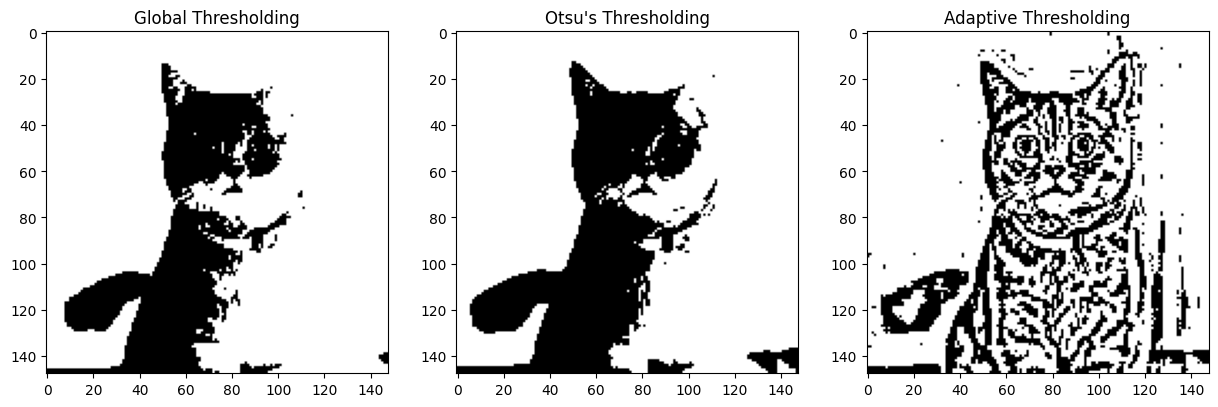

In [9]:
_, thresh_global = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
_, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(thresh_global, cmap='gray'), plt.title('Global Thresholding')
plt.subplot(1,3,2), plt.imshow(thresh_otsu, cmap='gray'), plt.title("Otsu's Thresholding")
plt.subplot(1,3,3), plt.imshow(thresh_adaptive, cmap='gray'), plt.title('Adaptive Thresholding')
plt.show()

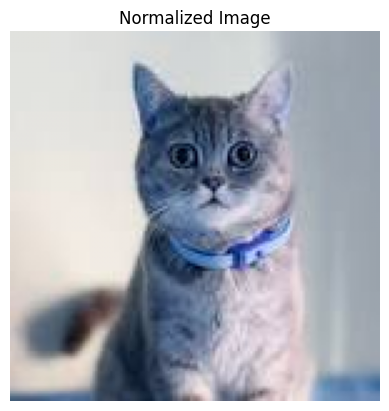

In [10]:
normalized = image / 255.0
plt.imshow(normalized)
plt.title("Normalized Image")
plt.axis('off')
plt.show()

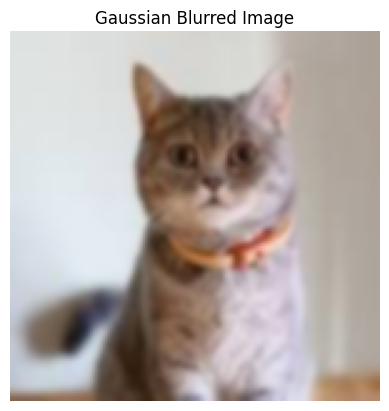

In [11]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurred Image")
plt.axis('off')
plt.show()

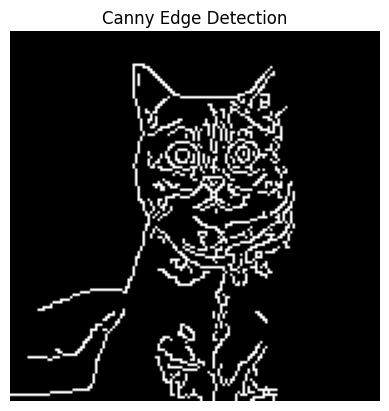

In [12]:
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

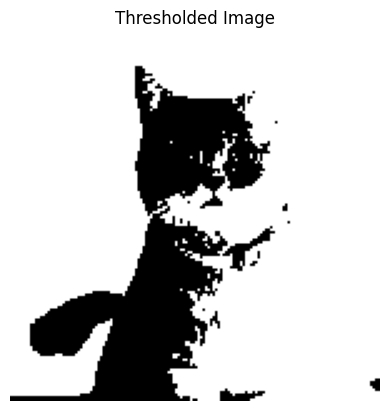

In [13]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()

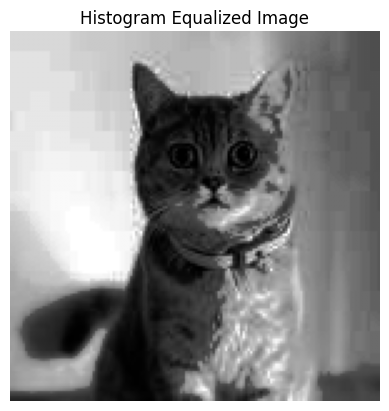

In [14]:
equalized = cv2.equalizeHist(gray)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()

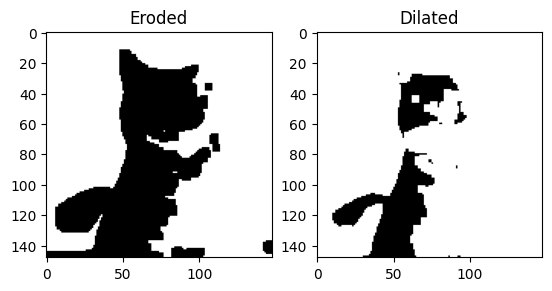

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

eroded = cv2.erode(thresh, kernel, iterations=1)
dilated = cv2.dilate(thresh, kernel, iterations=1)

plt.subplot(1,2,1), plt.imshow(eroded, cmap='gray'), plt.title('Eroded')
plt.subplot(1,2,2), plt.imshow(dilated, cmap='gray'), plt.title('Dilated')
plt.show()

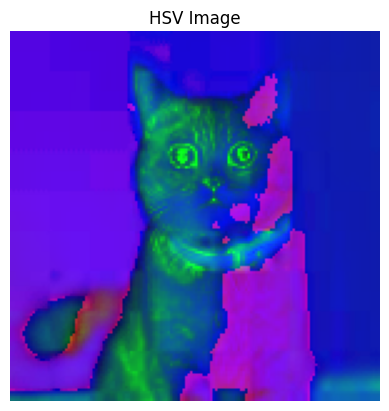

In [20]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)
plt.title("HSV Image")
plt.axis('off')
plt.show()

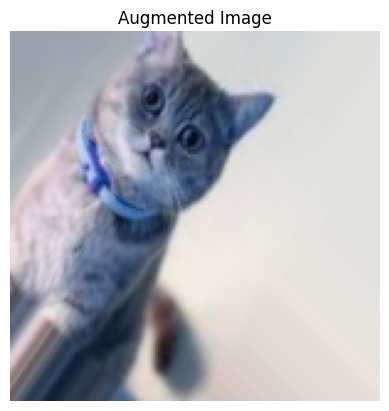

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

img_array = cv2.resize(image, (150,150))  # Resize for augmentation
img_array = np.expand_dims(img_array, 0)

aug_iter = datagen.flow(img_array)
aug_image = next(aug_iter)[0].astype(np.uint8)

plt.imshow(aug_image)
plt.title("Augmented Image")
plt.axis('off')
plt.show()

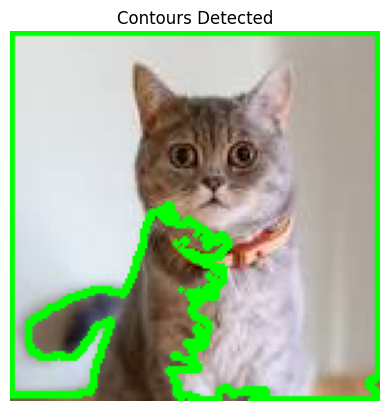

In [22]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title("Contours Detected")
plt.axis('off')
plt.show()

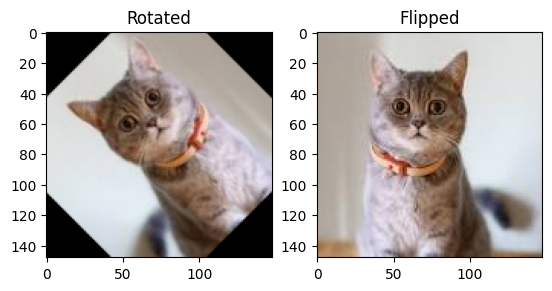

In [23]:
# Rotate
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

# Flip
flipped = cv2.flip(image, 1)  # Horizontal flip

plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)), plt.title("Rotated")
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)), plt.title("Flipped")
plt.show()

In [24]:
import gradio as gr

def preprocess_demo(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized = cv2.resize(img, (224, 224))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(resized, (5,5), 0)
    canny = cv2.Canny(gray, 100, 200)

    return [resized, gray, blur, canny]

gr.Interface(
    fn=preprocess_demo,
    inputs=gr.Image(type="numpy"),
    outputs=[
        gr.Image(label="Resized"),
        gr.Image(label="Grayscale"),
        gr.Image(label="Blurred"),
        gr.Image(label="Canny Edge"),
    ],
    title="CV Preprocessing Demo"
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8b311860098a5630e6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


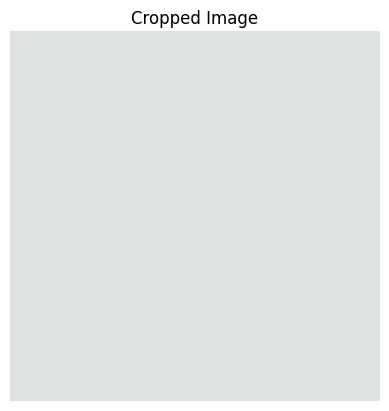

In [28]:
cropped = image[1:2, 2:3]  # [y1:y2, x1:x2]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis('off')
plt.show()

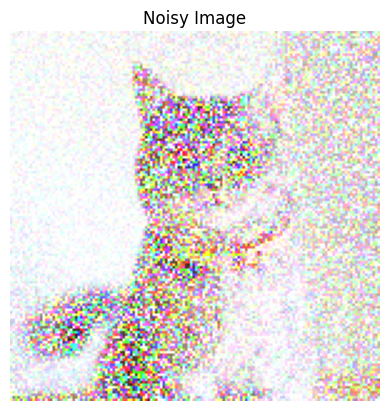

In [29]:
import numpy as np

noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_img = cv2.add(image, noise)

plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis('off')
plt.show()

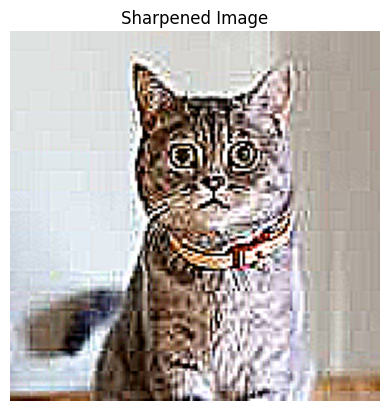

In [30]:
sharpen_kernel = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])
sharpened = cv2.filter2D(image, -1, sharpen_kernel)

plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis('off')
plt.show()

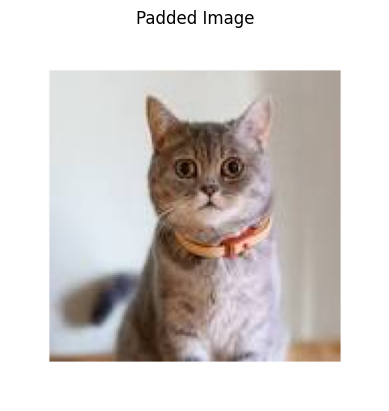

In [31]:
padded = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[255,255,255])
plt.imshow(cv2.cvtColor(padded, cv2.COLOR_BGR2RGB))
plt.title("Padded Image")
plt.axis('off')
plt.show()

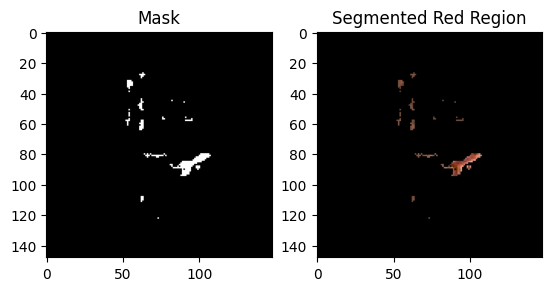

In [32]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
mask = cv2.inRange(hsv, lower_red, upper_red)
result = cv2.bitwise_and(image, image, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Segmented Red Region")
plt.show()